In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import scipy as sp
from scipy import stats
import sklearn

from scipy.stats import norm
import matplotlib.mlab as mlab

#from statsmodels.stats.diagnostic import lilliefors
#import statsmodels.api as sm 
from scipy.stats import chisquare

import pingouin as pg

from sklearn.preprocessing import PowerTransformer
import scipy.stats

import statsmodels.stats.weightstats as wstats

import time

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
CSN_path = './Data/'



def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

CSN_new_err = CSN['Error'][-18:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments', 'Error'], axis=1)

#tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)


CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

#CSN_hold = sklearn.utils.shuffle(CSN_new, random_state=65788)
CSN_new = CSN_new[-18:]
#CSN_test = CSN_hold[-tsize:]

In [3]:
#206 machine ELU, ELU, ReLU but with new LCPLCP database
out = np.load('Data/true_test_L_eluelurelu.pkl', allow_pickle=True)

In [4]:
def cohen_dd(a,b,c,d):
    na = 100
    nb = 100
    dof = na + nb - 2
    Mean1 = a
    Mean2 = b
    STD1 = c
    STD2 = d
    cohenDD = (Mean1 - Mean2)/ np.sqrt(((na-1)*(STD1)** 2 + (nb-1)*(STD2)** 2) / dof)
    
              
    print (cohenDD)
    return cohenDD

In [5]:
def ztest(a1,a2,delta,c1,c2,n):
    z = (a1-a2-delta)/np.sqrt(((c1**2)/n)+((c2**2)/n))
    print (z)
    return z

0.40815672203898423
0.28551493218541135
0.1597378059402108
0.4132142900824547
0.42361213314533236
0.18494674172997483
0.04633031699061391
0.22502741087973116
0.2738862149640918
0.29155425193905826
0.11581649154424667
0.652241904973507
0.7109222118735314
0.642422265625894
0.16058349325573443
0.19873297596644163
0.1964321039258766
0.17771618020837307


/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


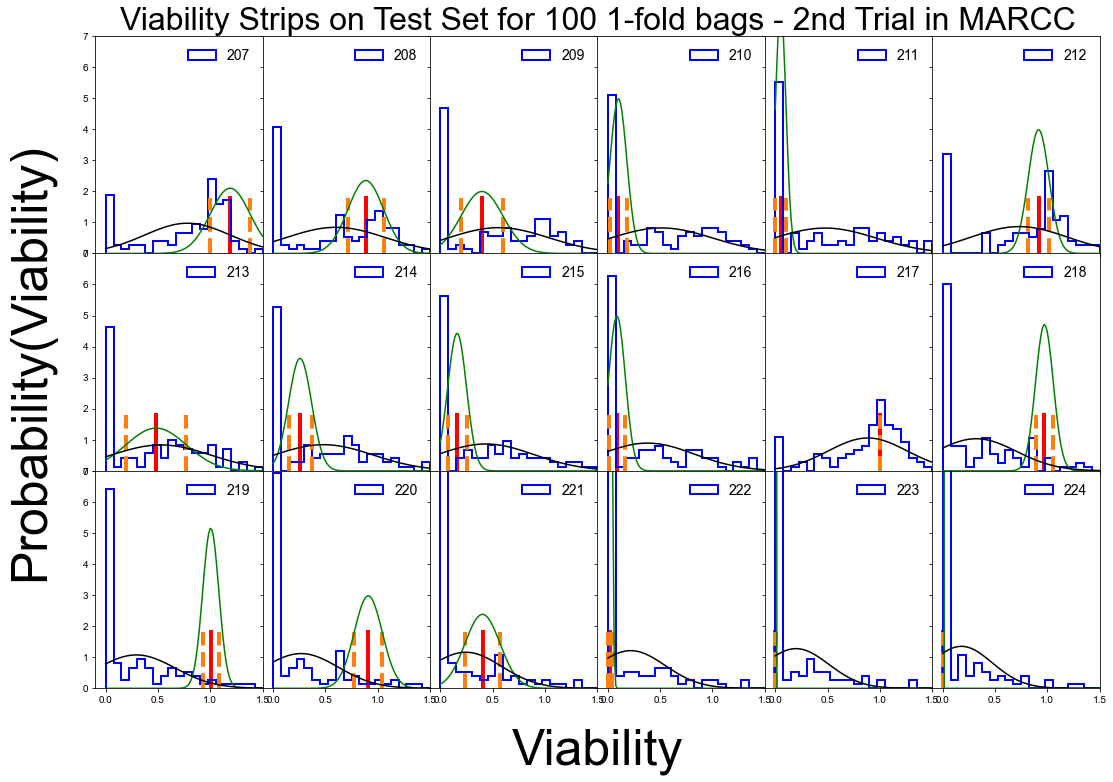

In [6]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
plt.title('Viability Strips on Test Set for 100 1-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 0, 0, i])
    variance= np.var(out[:, 0, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    #percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 0, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 0, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out[:, 0, 0, i], bins=20, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
    
#plt.show()
#plt.savefig('A_100_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [7]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out[:, 0, 0, i])
            b_list.append(M)

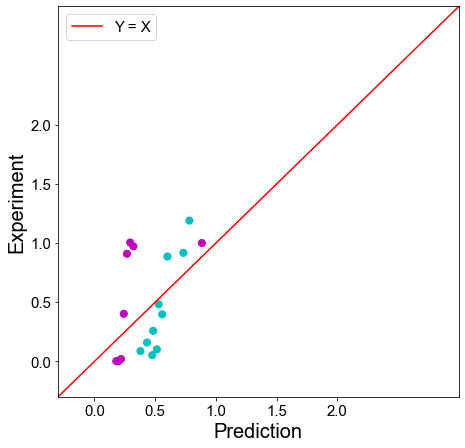

In [8]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.3665150187710148
0.3380283239473638
0.10251858434868477
0.34291495514828324
0.33053644755605877
0.15269863337900025
0.0061012905105496396
0.16264148293746744
0.2104224089263745
0.23841283678334438
0.07577425111760971
0.67314594147457
0.728054936457541
0.6553150572429528
0.16857673546402763

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)



0.19525758988470437
0.19548430395798133
0.17895935846267733


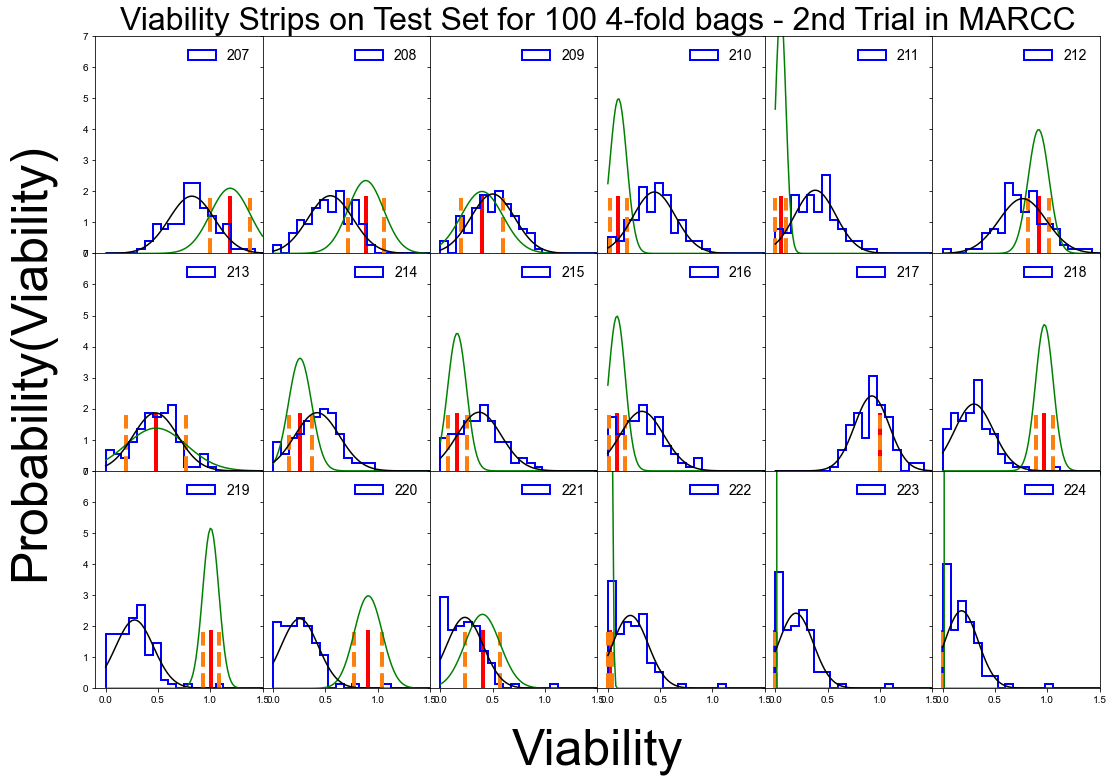

In [9]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
plt.title('Viability Strips on Test Set for 100 4-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 1, 0, i])
    variance= np.var(out[:, 1, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    #percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out[:, 1, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 1, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 1, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 1, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out[:, 1, 0, i], bins=20, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('B_100_4.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [10]:
  a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out[:, 1, 0, i])
            b_list.append(M)

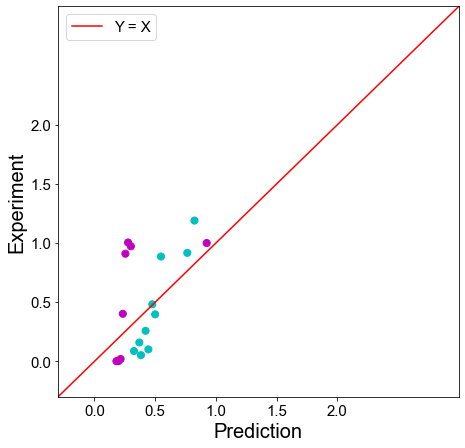

In [11]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.3320780048177482
0.3034039718275574
0.13086051417899602
0.3708496007769924
0.3656102559222623
0.13056105198448975
0.0036410073932265363
0.16545790916644432
0.21073576200658947
0.23044672244317896
0.07340226174238851
0.6594445367885038
0.7193368145017823
0.6511726873383987
0.16813608170606548
0.1918185216791611
0.18931055781935416
0.17132751976533525


/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


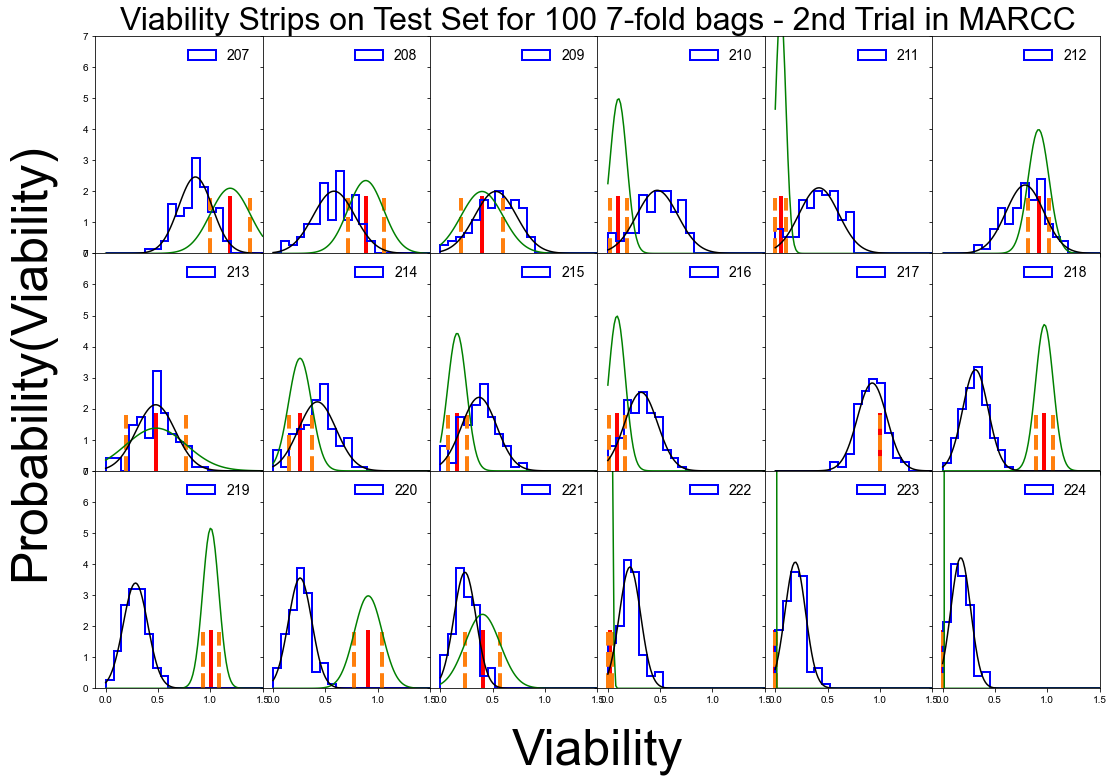

In [12]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
plt.title('Viability Strips on Test Set for 100 7-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 2, 0, i])
    variance= np.var(out[:, 2, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out[:, 2, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 2, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 2, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 2, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out[:, 2, 0, i], bins=20, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('C_100_7.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [13]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out[:, 2, 0, i])
            b_list.append(M)

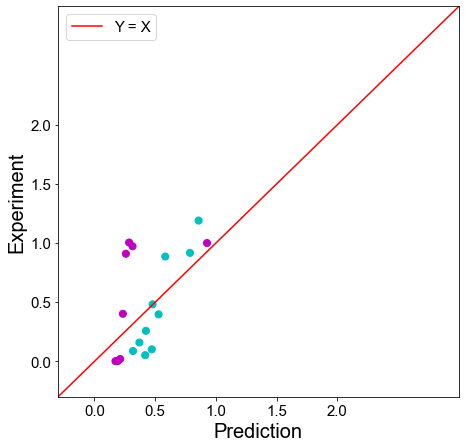

In [14]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.33340281260188664
0.3060251045330581
0.129653396798053
0.3667055778359714
0.3541478672713357
0.1244544176729585
0.006741148984619139
0.17603990601860248
0.21962609224302013
0.24007897030955935
0.06105076441232493
0.6812823036019646
0.7396770597201923
0.6695939984176325
0.1843328405737132
0.17747355327161263
0.1764871515758861
0.16024659437881753


/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


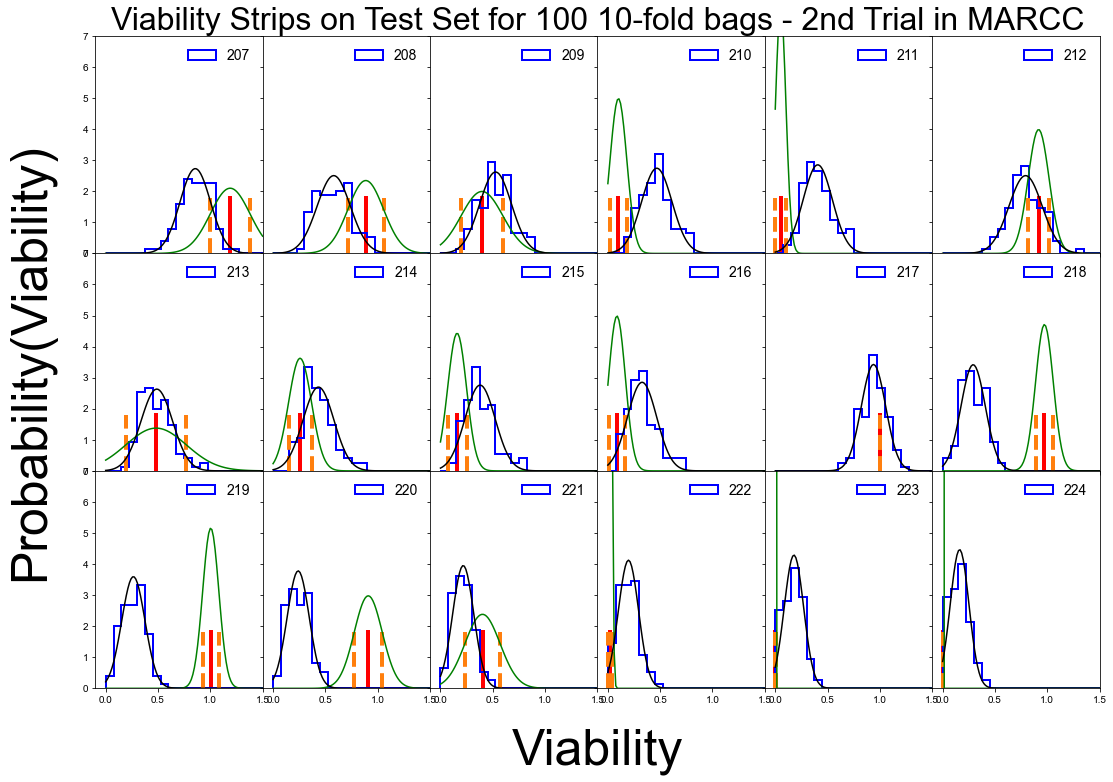

In [15]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
plt.title('Viability Strips on Test Set for 100 10-fold bags - 2nd Trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out[:, 3, 0, i])
    variance= np.var(out[:, 3, 0, i])
    sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out[:, 3, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out[:, 3, 0, i])
    #print (V)
    
    W = stats.normaltest(out[:, 3, 0, i])
    #print (W)
    
    A = scipy.stats.ttest_1samp(out[:, 3, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.1, 1.5])
    axes[i].hist(out[:, 3, 0, i], bins=20, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+207, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    
    axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    y1 = scipy.stats.norm.pdf(x,M,sigma1)
    axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_dd(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,100)
#plt.show()
#plt.savefig('D_100_10.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [16]:
  a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out[:, 3, 0, i])
            b_list.append(M)

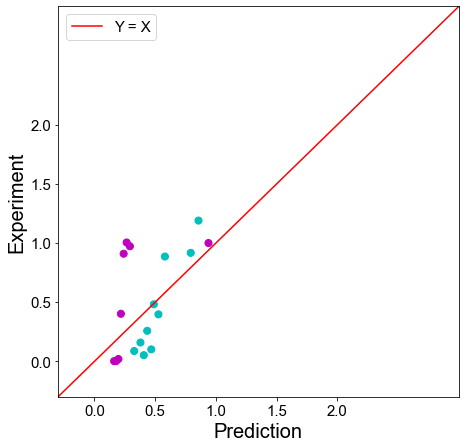

In [17]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()